### Úloha 13.1

Načítajte dataset Wines z dvoch súborov a integrujte ho do jedného dátového rámca.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
red = pd.read_csv('../data/winequality_red.csv') # nacitame prvy subor do datoveho ramca red
white = pd.read_csv('../data/winequality_white.csv') # nacitame druhy subor do datoveho ramca white

wines = pd.concat([red, white]) # vytvorime datovy ramec wines spojenim datovych ramcov red a white

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Úloha 13.2

Predspracujte dátový rámec Wines vhodným spôsobom pre účely zhlukovania dát

In [4]:
from sklearn.preprocessing import MinMaxScaler
wines = wines.drop(['quality'], axis=1)

scaler = MinMaxScaler()
scaler.fit(wines)
wines_norm = pd.DataFrame(scaler.fit_transform(wines), index=wines.index, columns=wines.columns)
wines_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


### Úloha 13.3

Skúste vytvoriť zhlukovací model K-Means a nájdite najvhodnejší počet zhlukov pre model. 

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, max_iter=500)
model.fit(wines_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
Sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(wines_norm)
    Sum_of_squared_distances.append(km.inertia_)
    
print(Sum_of_squared_distances)

[756.1775002318875, 591.5971762084927, 461.1650907349134, 413.0710186153012, 376.4395810387645, 350.12387906005614, 334.1615907290335, 320.5414754316889, 308.3507049792219, 296.9891901459149, 287.48651929728396, 278.7957116047543, 271.2855335127092, 265.1543270839087]


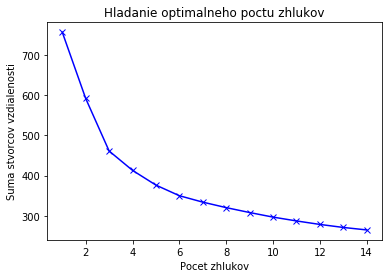

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Pocet zhlukov')
plt.ylabel('Suma stvorcov vzdialenosti')
plt.title('Hladanie optimalneho poctu zhlukov')
plt.show()

### Úloha 13.4

Preskúmajte jednotlivé zhluky pre najlepší model - vypíšte centroidy a vypočítajte vájomné vzdialenosti. Pozrite sa na príklady priradené do jednotlivých zhlukov a skúste zhluky porovnať z hľadiska hodnôt jednotlivých atribútov.

In [8]:
# natrénujeme model so zvoleným počtom zhlukov

model = KMeans(n_clusters=8)
model = model.fit(wines_norm)
y_kmeans = model.predict(wines_norm)

In [9]:
# teraz za pozrieme na centroidy jednotlivých zhlukov a vypíšeme ich:

centers = model.cluster_centers_ 
print("Vsetky centroidy:") 
print(centers)

Vsetky centroidy:
[[0.23672691 0.15694505 0.19894082 0.04897189 0.04574495 0.09678724
  0.23175166 0.070416   0.38020274 0.15111125 0.65248447]
 [0.52800185 0.21333333 0.28732896 0.03272749 0.15051956 0.04189538
  0.06943716 0.20481959 0.36502189 0.29814528 0.38365781]
 [0.29579388 0.11468416 0.2127109  0.05963113 0.05385837 0.09701639
  0.25743306 0.10999006 0.27794728 0.1404003  0.42341892]
 [0.237716   0.37105051 0.05713764 0.02735406 0.10713782 0.05028409
  0.07264349 0.1547102  0.59283533 0.23057542 0.46863563]
 [0.33009642 0.34696759 0.10994813 0.02951495 0.12517765 0.05604504
  0.12164299 0.1879078  0.45616925 0.2051264  0.24261272]
 [0.27318414 0.13726555 0.24120173 0.18335186 0.07399816 0.16353207
  0.40006642 0.20554585 0.29142083 0.15800215 0.17588022]
 [0.23955036 0.13241808 0.1737186  0.09334382 0.07585731 0.12431144
  0.33355073 0.15650428 0.39092104 0.14927157 0.23905265]
 [0.21373383 0.10985667 0.19149078 0.04193485 0.05551928 0.10795455
  0.27258999 0.1119819  0.510104

In [10]:
# pozrieme sa na príklady patriace jednotlivým zhlukom a spočítame popisné charakteristiky pre príklady z jednotlivých zhlukov

for x in range(0, 9):
    globals()['cluster_%s' % x] = np.where(model.labels_==x)
    globals()['data_cluster_%s' % x] = wines.iloc[globals()['cluster_%s' % x]]
    

In [16]:
data_cluster_5.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,7.105424,0.285833,0.400237,12.553008,0.053535,48.123767,179.616371,0.997769,3.095819,0.501302,9.214842
std,0.694016,0.093009,0.142925,4.356960,0.025434,17.819200,35.389481,0.002152,0.108299,0.097535,0.408614
min,5.600000,0.105000,0.090000,1.000000,0.029000,6.000000,94.000000,0.992880,2.720000,0.290000,8.500000
25%,6.600000,0.230000,0.290000,10.125000,0.044000,36.000000,156.000000,0.996600,3.030000,0.440000,8.900000
50%,7.050000,0.270000,0.380000,12.900000,0.048000,48.500000,180.000000,0.997860,3.100000,0.490000,9.200000
75%,7.500000,0.330000,0.490000,15.000000,0.055000,58.000000,202.000000,0.998720,3.160000,0.540000,9.400000
max,10.700000,0.965000,1.000000,65.800000,0.301000,289.000000,440.000000,1.038980,3.510000,1.030000,11.700000


In [17]:
data_cluster_3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,6.676364,0.636576,0.094848,2.383485,0.073497,15.481818,37.527273,0.995135,3.484758,0.630424,11.233586
std,0.828951,0.176941,0.106180,0.972810,0.021259,9.541844,24.082448,0.001757,0.124710,0.123699,0.915668
min,4.600000,0.300000,0.000000,0.800000,0.029000,3.000000,7.000000,0.989810,3.140000,0.370000,9.400000
25%,6.200000,0.520000,0.010000,1.900000,0.060000,8.000000,19.000000,0.994020,3.390000,0.560000,10.700000
50%,6.700000,0.607500,0.060000,2.200000,0.073000,14.000000,32.000000,0.995200,3.460000,0.610000,11.100000
75%,7.175000,0.715000,0.140000,2.500000,0.082000,20.000000,46.750000,0.996263,3.560000,0.690000,11.700000
max,10.100000,1.580000,0.660000,7.800000,0.172000,50.000000,134.000000,1.001000,4.010000,1.160000,14.000000


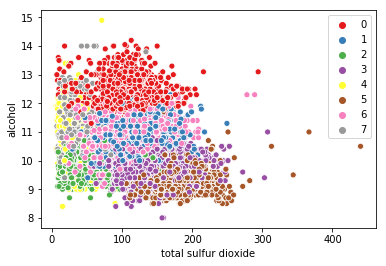

In [45]:
# Môžeme skúsiť vizualizovať vzájomné závislosti atribútov, takých, ktorých popisné charakteristiky sú pre rôzne zhluky rozdielne
# Z vizualizácii vieme potom odhadnúť a popísať niektoré zhluky

import seaborn as sns
g = sns.scatterplot(x='total sulfur dioxide', y='alcohol', hue=y_kmeans, legend='full', data=wines, palette='Set1')